In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('csv_files/marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data = data.drop('Customer', axis =1)

In [5]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
data['Response'].count()

9134

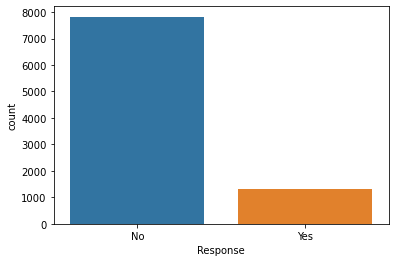

In [8]:
fig_1 = sns.countplot(x='Response', data=data)

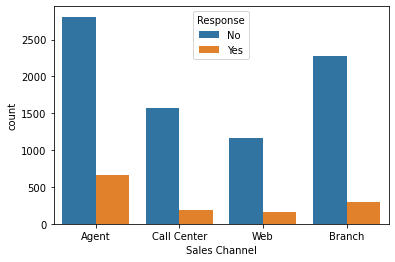

In [9]:
fig_2 = sns.countplot(x='Sales Channel', hue='Response', data=data)

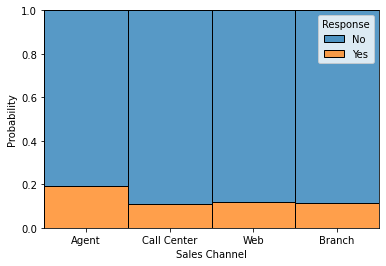

In [10]:
fig_2 = sns.histplot(x='Sales Channel', hue='Response', data=data, multiple='fill', stat='probability')

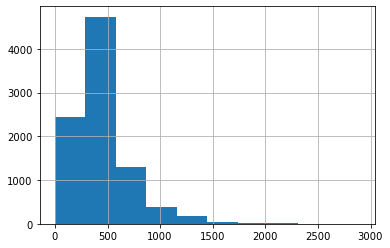

In [11]:
data['Total Claim Amount'].hist()
plt.show()

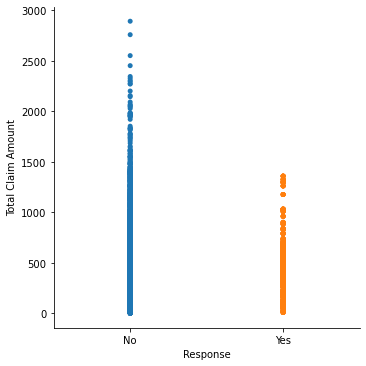

In [12]:
fig_3 = sns.catplot(x='Response', y='Total Claim Amount', jitter = False, data=data)

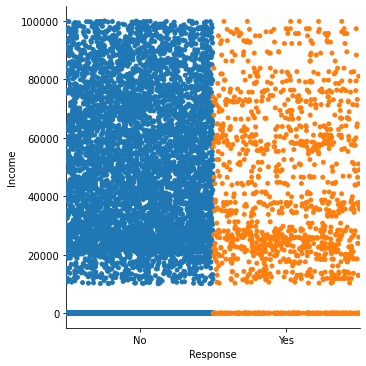

In [16]:
fig_3 = sns.catplot(x='Response', y='Income', jitter = 0.5, data=data)

In [ ]:
#lab 4

In [18]:
data.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


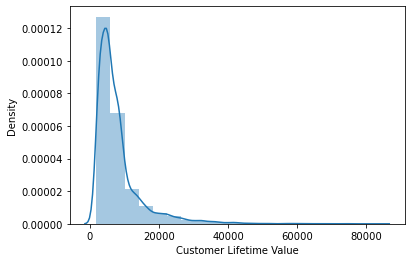

In [19]:
sns.distplot(data['Customer Lifetime Value'], bins=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

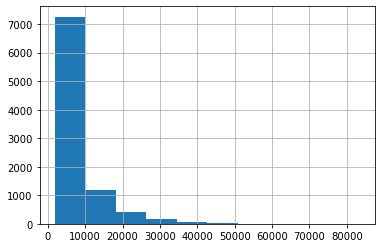

In [20]:
data['Customer Lifetime Value'].hist()
plt.show

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

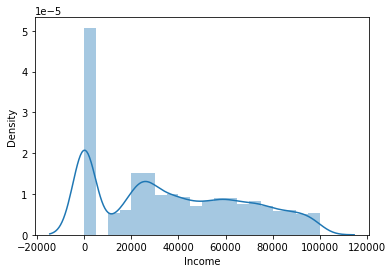

In [21]:
sns.distplot(data['Income'], bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

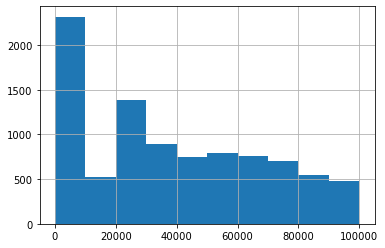

In [22]:
data['Income'].hist()
plt.show

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

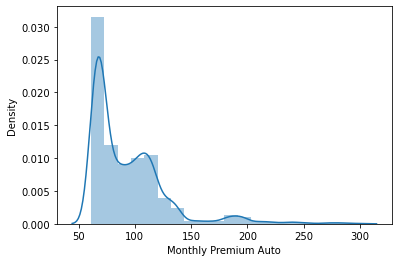

In [23]:
sns.distplot(data['Monthly Premium Auto'], bins=20)
plt.show

In [24]:
corr_matrix = data.corr(method='spearman')
corr_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
Income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
Monthly Premium Auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
Months Since Last Claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
Months Since Policy Inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
Number of Open Complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
Number of Policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
Total Claim Amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


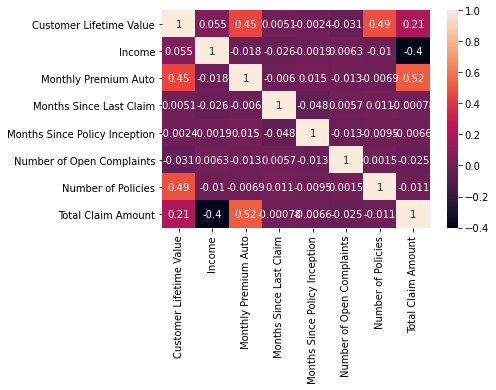

In [25]:
sns_splot = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [26]:
y = data['Total Claim Amount']
X = data.drop(['Total Claim Amount'], axis=1)

In [28]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [29]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [30]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [31]:
df = np.concatenate((X_num, encoded), axis=1)
df.shape

(9134, 108)

In [32]:
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(df_train,y_train)

LinearRegression()

In [33]:
predictions = model.predict(df_test)
predictions

array([175.39816938, 468.83382306, 466.87415014, ..., 678.64153562,
       106.65075002, 575.53205397])

In [34]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7620357913031102, 139.37734253082516, 19426.043610954966)

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

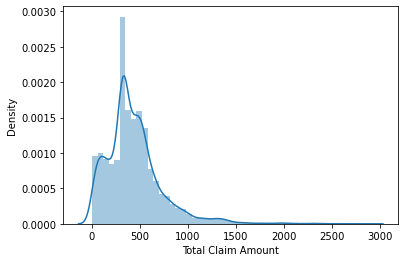

In [71]:
# lab7 (round5)
sns.distplot(data['Total Claim Amount'])
plt.show

In [36]:
data1 = data.copy()

In [56]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [68]:
data1['Total Claim Amount'] = data1['Total Claim Amount'].apply(log_transfom_clean)
data1['Total Claim Amount'] = data1['Total Claim Amount'].fillna(np.mean(data1['Total Claim Amount']))

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

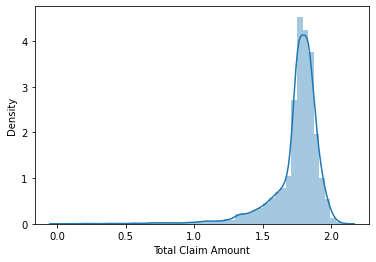

In [74]:
sns.distplot(data1['Total Claim Amount'])
plt.show

In [73]:
data1['Total Claim Amount'] = np.where(data1['Total Claim Amount']<=0, np.NAN, data1['Total Claim Amount'])
data1['Total Claim Amount'] = data1['Total Claim Amount'].fillna(data1['Total Claim Amount'].mean())

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


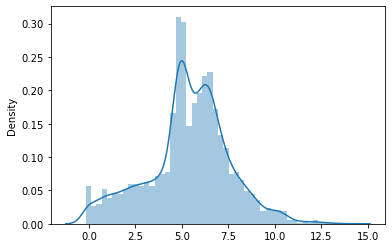

In [75]:
transformed_data, _ci = stats.boxcox(data1['Total Claim Amount'])
sns.distplot(transformed_data)
plt.show()

In [ ]:
# more feature scaling

In [76]:
transformer = Normalizer()
transformer.fit(X_num)

x_normalized = transformer.transform(X_num)
x_normalized

array([[4.90491254e-02, 9.98795451e-01, 1.22466656e-03, ...,
        8.87439538e-05, 0.00000000e+00, 1.77487908e-05],
       [9.99888829e-01, 0.00000000e+00, 1.34664469e-02, ...,
        6.01692310e-03, 0.00000000e+00, 1.14608059e-03],
       [2.55493903e-01, 9.66807936e-01, 2.14110479e-03, ...,
        7.53351684e-04, 0.00000000e+00, 3.96500886e-05],
       ...,
       [9.99934829e-01, 0.00000000e+00, 1.04110242e-02, ...,
        4.53185758e-03, 3.67447912e-04, 2.44965274e-04],
       [3.24391165e-01, 9.45912819e-01, 4.13871886e-03, ...,
        1.29334965e-04, 0.00000000e+00, 1.29334965e-04],
       [9.98972589e-01, 0.00000000e+00, 2.94508782e-02, ...,
        3.44231043e-02, 0.00000000e+00, 3.82478937e-04]])

In [78]:
transformer = StandardScaler()
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized.T

array([[-0.76287773, -0.14924546,  0.71063622, ...,  0.02313483,
        -0.06993547, -0.78495478],
       [ 0.61282744, -1.23961684,  0.36570978, ..., -1.23961684,
        -0.51735647, -1.23961684],
       [-0.70392465,  0.02269103,  0.42959581, ..., -0.23889062,
         0.08082028, -0.47140763],
       ...,
       [-1.54328695, -0.21733419, -0.36068043, ..., -0.39651699,
        -1.61496007,  1.50282075],
       [-0.42224956, -0.42224956, -0.42224956, ...,  2.87324529,
        -0.42224956, -0.42224956],
       [-0.82264788,  2.10615996, -0.40424676, ..., -0.40424676,
         0.01415436, -0.82264788]])

/Users/agathantavrazou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

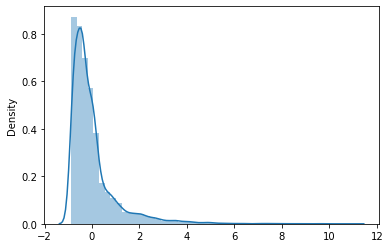

In [79]:
sns.distplot(x_standardized.T[0])